**Course**: BIO-341 [_Dynamical systems in Biology_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2024

Note that this document is primarily aimed at being consulted as a Jupyter notebook, the PDF rendering being not optimal.

In [1]:
#import some of the libraries you'll need
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from ipywidgets import interact
from scipy.integrate import odeint
import plotly.graph_objects as go

set_matplotlib_formats('png', 'pdf')

/var/folders/yf/q5hy0j9s5td1mjcljsx68fxh0000gq/T/ipykernel_41792/1076716760.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


A. Consider the following two-dimensional model (the van der Pol oscillator):

$\frac{dx}{dt} = y$ 

$\frac{dy}{dt} = -x + \mu(1 - x^2)y$

where $\mu$ is a real constant (positive or negative). This question explores some of the conditions for there to be a bifurcation at $\mu$ = 0, in which a stable spiral changes to an unstable spiral and a limit cycle appears as the parameter $\mu$ is varied (but we are not looking at the limit cycle in this problem.)

1) The origin (0,0) is a fixed point for any value of $\mu$. Find the Jacobian at the origin, and evaluate its trace and determinant in terms of $\mu$

> (0,0) is a fixed point
> $$J=\begin{pmatrix}0 & 1 \\ -1-2uxy &\mu(1-x^2)\end{pmatrix}$$
 
> $$J(0,0)=\begin{pmatrix}0 & 1 \\ -1 &\mu\end{pmatrix}$$

> $tr = \mu$, det=1

2) State why that the origin cannot be a saddlepoint for any value of $\mu$.

> det=1 > 0 so it is never a saddlepoint

3) On the Tau-Delta plot, mark the location of the fixed point for the following values of $\mu$ = -3, -2, -1, 0, 1, 3. Label each point with the type/stability of the fixed point. For the case $\mu$ = -2, find the eigenvalue(s) and eigenvector(s) and determine if the fixed point is a star or degenerate node.


> $\mu$=-3, tr=-3, det=1, $tr^2$ -4det = 5 > 0

> $\mu$=-2, tr=-2, det=1, $tr^2$ -4det = 0;
> $\lambda = \frac{-2 +/- sqrt(4-4)}{2} = -1$ -> one eigenvalue
> Eigenvector for $\lambda = -1$ : 
> $$\nu_1=\begin{pmatrix} 1 \\ -1  \end{pmatrix}$$

> because there is only one vector, it is a degenerate node

> $\mu$=-1, tr=-1, det=1, $tr^2 -4det = -3$ -> stable spiral

> $\mu$=0, tr=0, det=1, $tr^2 -4det = -4$ -> A center because tr=0

> $\mu$=1, tr=1, det=1, $tr^2 -4det = -3$ -> unstable spiral

> $\mu$=2, tr=2, det=1, $tr^2 -4det = 0$; $\lambda = 1$ only one eigenvalue
> Eigenvector for $\lambda = 1$ : 
> $$\nu_1=\begin{pmatrix} 1 \\ 1  \end{pmatrix}$$

> because there is only one vector, it is a degenerate node

> $\mu$=3, tr=3, det=1, $tr^2 -4 det = 5$ -> unstable node


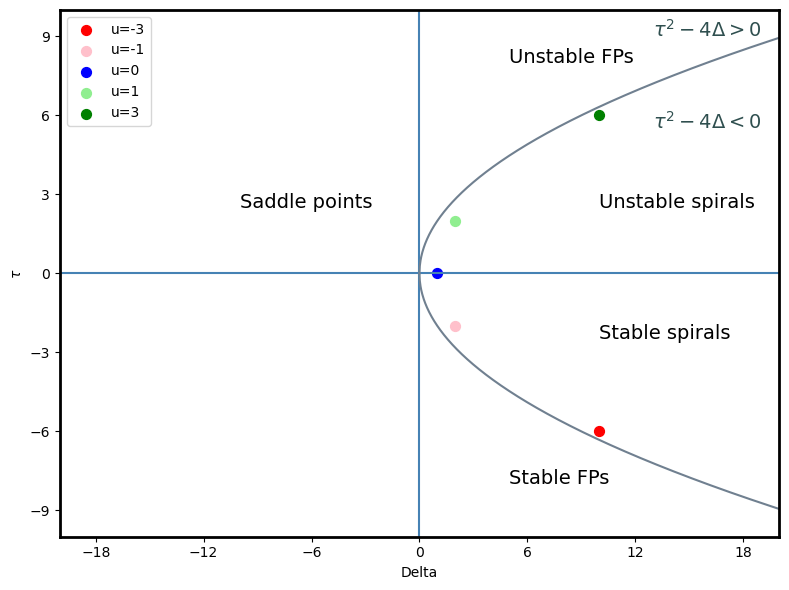

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the x and y nullclines
ax.plot([0, 0], [-20, 20], color='steelblue', linewidth=1.5)
ax.plot([-20, 20], [0, 0], color='steelblue', linewidth=1.5)

# Plot the curves without adding them to the legend
x_ = np.linspace(0, 20, 1000)
y_ = np.sqrt(4 * x_)
ax.plot(x_, y_, color='slategrey', linewidth=1.5)  # Curve 1
ax.plot(x_, -y_, color='slategrey', linewidth=1.5) # Curve 2

# Add individual red dots and include them in the legend
ax.scatter(10, -6, color='red', s=50, label="u=-3")
ax.scatter(2, -2, color='pink', s=50, label="u=-1")
ax.scatter(1, 0, color='blue', s=50, label="u=0")
ax.scatter(2, 2, color='lightgreen', s=50, label="u=1")
ax.scatter(10, 6, color='green', s=50, label="u=3")

# Add text annotations
ax.text(5, 8, 'Unstable FPs', fontsize=14, color='black')
ax.text(5, -8, 'Stable FPs', fontsize=14, color='black')
ax.text(10, 2.5, 'Unstable spirals', fontsize=14, color='black')
ax.text(10, -2.5, 'Stable spirals', fontsize=14, color='black')
ax.text(-10, 2.5, 'Saddle points', fontsize=14, color='black')
ax.text(13, 9, r'$\tau^2 - 4\Delta > 0$', fontsize=14, color='darkslategrey')
ax.text(13, 5.5, r'$\tau^2 - 4\Delta < 0$', fontsize=14, color='darkslategrey')

# Set axis labels
ax.set_xlabel('Delta')
ax.set_ylabel(r'$\tau$')

# Configure the legend to be horizontal and above the plot
ax.legend(loc='upper left')

# Set axis limits and ticks
ax.set_xlim([-20, 20])
ax.set_ylim([-10, 10])
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

# Set grid and border styles
ax.grid(False)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Show the plot
plt.tight_layout()
plt.show()


4) For the case $\mu$ = -1, draw the phase portrait including only the nullclines (with the direction of the other vector field dx/dt and dy/dt along them) and some typical trajectories (don’t spend too long on the trajectories!). Can you infer the type of the fixed point from the phase portrait?

> Nullclines:

> $\frac{dx}{dt} = y = 0$ i.e x axis

> $\frac{dy}{dt} = -x + \mu(1 - x^2)y = 0$ -> $y = \frac{x}{x^2 -1}$


> What is $\frac{dy}{dt}$ along $\frac{dx}{dt}=0$ ?

> $\frac{dy}{dt} = -x$

> What is $\frac{dx}{dt}$ along $\frac{dy}{dt}=0$ ?

> $ \frac{dx}{dt} = \frac{x}{x^2 -1}$


/var/folders/yf/q5hy0j9s5td1mjcljsx68fxh0000gq/T/ipykernel_41792/2970768913.py:36: RuntimeWarning: invalid value encountered in divide
  dx, dy = dx/np.sqrt(dx**2+dy**2), dy/np.sqrt(dx**2+dy**2)
/Users/duperrex/anaconda3/envs/bio_341/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2382264443449D+01   r2 =  0.1906564606017D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2382264443449D+01   r2 =  0.1906564606017D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2382264443449D+01   r2 =  0.1906564606017D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2382264443449D+01   r2 =  0.1906564606017D-15
 lsoda--  warning..internal t (=r1) 

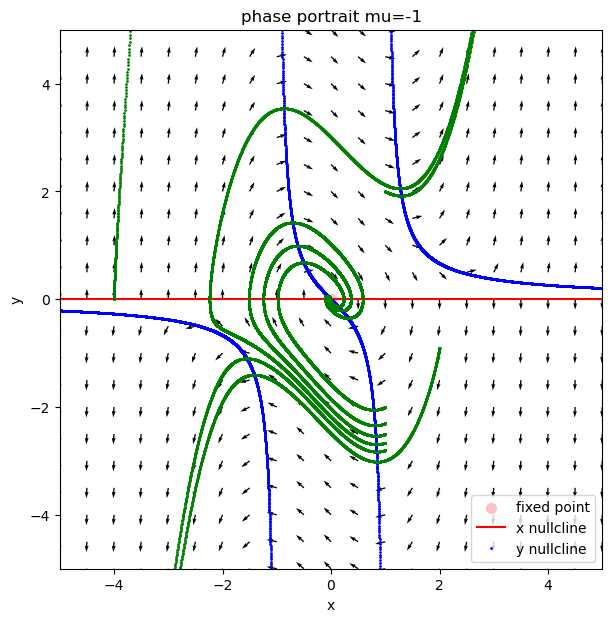

In [3]:
u=-1
def model(s,t=0):
    x,y=s
    x_dot=y
    y_dot=-x+u*(1-x**2)*y
    return x_dot, y_dot    
    
# Time domain
tspan = np.linspace(0, 10, 10000)

# Initial conditions
X0s = [(0,-2), (-3,1),(3,-2),(3.1,-3.5),(-5,5.01)]  

X0s = [(1,-2), (2,-0.9),(1,2), (1,-2.8), (-4,0), (1,-2.5), (1,-2.3), (1,-2.66)]  

plt.figure(figsize=(7,7)) # create an empty figure

# Fixed points
plt.scatter(x = [0], y = [0], c = 'pink', s = 50, label = 'fixed point')


# Define the nullclines
x1 = np.arange(-7,7,0.01)
y1 = 0*x1
x2 = np.arange(-7,7,0.001)
y2 = x2 / (x2**2-1)
plt.plot(x1,y1,'r', label='x nullcline')
plt.plot(x2,y2,'.b',markersize=2, label='y nullcline')

# Vector field
q = np.arange(-7,7.1,0.5) 
xp, yp = np.meshgrid(q,q)
dx, dy = model([xp,yp]) 
# normalise the arrow length

dx, dy = dx/np.sqrt(dx**2+dy**2), dy/np.sqrt(dx**2+dy**2) 
plt.quiver(xp,yp,dx,dy) # plot the vector field

# Trajectories
sols = []
for X0 in X0s: # different initial conditions 
    sol = odeint(model,X0, tspan) # solve the differential equation using an ODE solver "odeint" 
    sols.append(sol)
    plt.plot(sol[:,0],sol[:,1],'.g',markersize=2) # plot the trajectories

# Adjust the plot 
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('phase portrait mu=-1')
plt.legend()
plt.show()

5) How does the fixed point change character as $\mu$ increases from negative to positive values?

> The fixed point changes from a stable spiral to an unstable spiral as $\mu$ passes through zero to positive values

B. Now consider the similar equations:

$\frac{dx}{dt} = y + \mu x$ 

$\frac{dy}{dt} = -x + \mu(1 - x^2)y$

1) Find the Jacobian for the fixed point at the origin, and the fixed point’s type and stability for $\mu$ = -3, -1, 0, 1, 3. What is different from the previous case?

> (0,0) is a fixed point
> $$J=\begin{pmatrix}\mu& 1 \\ -1-2 \mu xy &\mu(1-x^2)\end{pmatrix}$$
 
> $$J(0,0)=\begin{pmatrix}\mu& 1 \\ -1 &\mu\end{pmatrix}$$

> $tr = 2\mu$, $det=\mu^2+1$, $tr^2 -4det = 4\mu^2 - 4(\mu^2+1) = -4$ for all $\mu$, as det>0 -> it is never a saddlepoint for all $\mu$


> $\mu=-3$, tr=-6, det=10

> $\mu=-1$, tr=-2, det=2

> $\mu=0$, tr=0, det=1

> $\mu=1$, tr=2, det=2

> $\mu=3$, tr=6, det=10


2) Are there other fixed points than the origin for this model? If so, find their coordinates (x*, y*) as a function of $\mu$. Set $\mu$ = 0.1 and find the coordinates of any non-zero fixed points.

> There are non-zero fixed points

> $(  -\sqrt{1+\frac{1}{\mu^2}},\mu\sqrt{1+\frac{1}{\mu^2}}) $ and $( \sqrt{1+\frac{1}{\mu^2}}, -\mu\sqrt{1+\frac{1}{\mu^2}}) $

3) For the value $\mu$ = 0.1, draw the phase portrait including: the nullclines, fixed point(s), and direction of the vector field on the nullclines (not trajectories). How is the phase portrait different from the previous case?

> Nullclines:

> $\frac{dx}{dt} = 0$ -> $y = -0.1x$

> $\frac{dy}{dt} = 0$ -> $y = \frac{10x}{1-x^2}$


> What is $\frac{dy}{dt}$ along $\frac{dx}{dt}=0$ ?

> $\frac{dy}{dt} = 0.01x(x^2-101)$

> What is $\frac{dx}{dt}$ along $\frac{dy}{dt}=0$ ?

> $ \frac{dx}{dt} = 0.1x\frac{101-x^2}{1-x^2}$


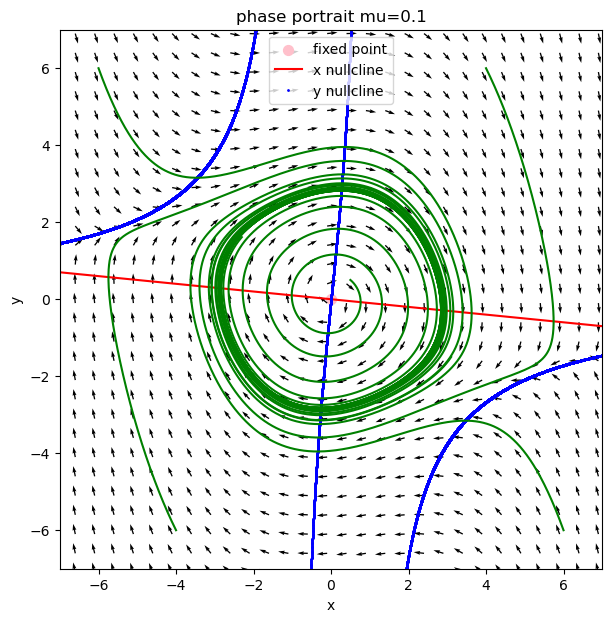

In [4]:
u=0.1
def model(s,t=0):
    x,y=s
    x_dot=y +u*x
    y_dot=-x+u*(1-x**2)*y
    return x_dot, y_dot    
    
# Time domain
tspan = np.linspace(0,30, 100000)

# Initial conditions
X0s = [(0,-2), (-3,1),(3,-2),(3.1,-3.5),(-5,5.01)]  

X0s = [(3.1,-1.5), (6,-6),(-6,6), (-4,-6), (4,6), (0.5,0.5)]  

plt.figure(figsize=(7,7)) # create an empty figure

# Fixed points
plt.scatter(x = [0], y = [0], c = 'pink', s = 50, label = 'fixed point')


# Define the nullclines
x1 = np.arange(-15,15,0.01)
y1 = -0.1*x1
x2 = np.arange(-15,15,0.001)
y2 = 10*x2 / (1-x2**2)
plt.plot(x1,y1,'r', label='x nullcline')
plt.plot(x2,y2,'.b',markersize=2, label='y nullcline')

# Vector field
q = np.arange(-7.1,7.1,0.5) 
xp, yp = np.meshgrid(q,q)
dx, dy = model([xp,yp]) 
# normalise the arrow length

dx, dy = dx/np.sqrt(dx**2+dy**2), dy/np.sqrt(dx**2+dy**2) 
plt.quiver(xp,yp,dx,dy) # plot the vector field

# Trajectories
sols = []
for X0 in X0s: # different initial conditions 
    sol = odeint(model,X0, tspan) # solve the differential equation\musing an ODE solver "odeint" 
    sols.append(sol)
    plt.plot(sol[:,0],sol[:,1],'g') # plot the trajectories

# Adjust the plot 
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('phase portrait mu=0.1')
plt.legend()
plt.show()